# Lab 4
The goal of this practical is to investigate the logistic regression model. This is broken down into four parts:
- [Part A](#Part-A:-Investigating-line-search): investigating line search as a method for optimising black box functions
- [Part B](PartB.ipynb): applying Newton's method and steepest descent as optimisation methods for two-dimensional functions
- [Part C](PartC.ipynb): using the same optimisation methods for fitting a logistic regression model to simple 2D data
- [Part D](PartD.ipynb): implementing the logistic regression model for face detection by using a binary classifier on image data

# Part A: Investigating line search
Look through the code to understand the goal of this part, and then fill in the 'TO DO' sections - starting with implementing the ['`line_search`'](#Optimisation-procedure) method 

### Import modules

In [299]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('machinevision.mplstyle')
from numpy import arange, array, exp, sin
from scipy.optimize import fmin

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Define functions to optimise
You can think of each of these functions as being a 'black box'

In [300]:
def my_function(x):
    if x < 0:
        return -x
    elif x > 1:
        return -sin((1 * 1.8)**2) + x - 1
    else:
        return -sin((x * 1.8)**2)


def my_function2(x):
    if x < 0:
        return -x - exp(-0.5 * (-0.2 / 0.025)**2)
    elif x > 1:
        return -sin((1 * 1.8)**2) + x - 1
    else:
        return -sin((x * 1.8)**2) - exp(-0.5 * ((x - 0.2) / 0.025)**2)

# Optimisation procedure

In [301]:
def line_search(function, start, end, tolerance):
    a = start
    d = end

    while (d - a) > tolerance:
        print('Current Search Region is {:6.6f} to {:6.6f}'.format(a, d))
        #break
        # TO DO - Implement a line search iteration:
        #
        # step 1: Remove the break above
        # step 2: Calculate intermediate positions b and c, 1/3 and 2/3 of the way through interval
        #         (between a and d), respectively
        #
        # step 3:  Evaluate function at points b and c
        #
        # step 4:  Update point a or d depending on the values of those evaluations
        b = (d - a) / 10 + a
        c = (d - a) * 9 / 10 + a
        if (function(b) < function(c)):
            d = c
        else:
            a = b
    return a, function(a)

# Construct data

In [302]:
#function = my_function
function = my_function2

x = arange(0, 1, step=0.01)
w = array([function(x_i) for x_i in x])


# Perform optimisation

### Line search

In [303]:
#randomly initialize start point and end point to find global minimum of my_function2, which has more than one local minimum
start = np.random.rand(1).item()
end = start + 0.5
min_x, min_value = line_search(function, start, end, tolerance=1e-4)

Current Search Region is 0.103049 to 0.603049
Current Search Region is 0.153049 to 0.603049
Current Search Region is 0.153049 to 0.558049
Current Search Region is 0.153049 to 0.517549
Current Search Region is 0.153049 to 0.481099
Current Search Region is 0.153049 to 0.448294
Current Search Region is 0.153049 to 0.418769
Current Search Region is 0.153049 to 0.392197
Current Search Region is 0.153049 to 0.368282
Current Search Region is 0.153049 to 0.346759
Current Search Region is 0.153049 to 0.327388
Current Search Region is 0.153049 to 0.309954
Current Search Region is 0.153049 to 0.294263
Current Search Region is 0.153049 to 0.280142
Current Search Region is 0.153049 to 0.267433
Current Search Region is 0.153049 to 0.255994
Current Search Region is 0.153049 to 0.245700
Current Search Region is 0.162314 to 0.245700
Current Search Region is 0.162314 to 0.237361
Current Search Region is 0.169818 to 0.237361
Current Search Region is 0.169818 to 0.230607
Current Search Region is 0.175897 

### SciPy optimisation
There is a SciPy method that can do this optimisation for you given a function.

**TO DO:** Look up the help page for the function `fmin`, you can also try `?fmin` in a new jupyter cell to get an information about functions.

In [304]:
scipy_min_x = fmin(function, x0=0, xtol=1e-4)
scipy_min_value = function(scipy_min_x)

Optimization terminated successfully.
         Current function value: -1.129756
         Iterations: 20
         Function evaluations: 40


In [305]:
?fmin

Signature:
fmin(
    func,
    x0,
    args=(),
    xtol=0.0001,
    ftol=0.0001,
    maxiter=None,
    maxfun=None,
    full_output=0,
    disp=1,
    retall=0,
    callback=None,
    initial_simplex=None,
)
Docstring:
Minimize a function using the downhill simplex algorithm.

This algorithm only uses function values, not derivatives or second
derivatives.

Parameters
----------
func : callable func(x,*args)
    The objective function to be minimized.
x0 : ndarray
    Initial guess.
args : tuple, optional
    Extra arguments passed to func, i.e., ``f(x,*args)``.
xtol : float, optional
    Absolute error in xopt between iterations that is acceptable for
    convergence.
ftol : number, optional
    Absolute error in func(xopt) between iterations that is acceptable for
    convergence.
maxiter : int, optional
    Maximum number of iterations to perform.
maxfun : number, optional
    Maximum number of function evaluations to make.
full_output : bool, optional
    Set to True if fopt and w

# Visualise results
If everything is working correctly the optimised `x` from the line search and the result from `fmin` should coincide, and appear to be at the function's minimum

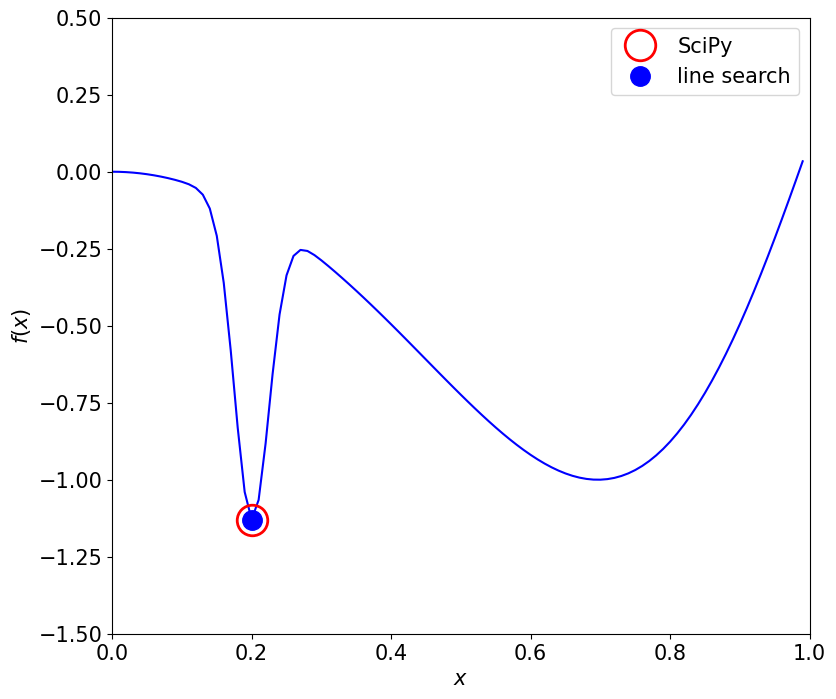

In [306]:
fig, ax = plt.subplots(figsize=(9, 8))

ax.plot(x, w, 'b-')
ax.plot(scipy_min_x, scipy_min_value, 'ro', markeredgewidth=2, markersize=22, label='SciPy')
ax.plot(min_x, min_value, 'bo', fillstyle='full', label='line search')

ax.set(xlabel='$x$', ylabel='$f(x)$', xlim=[0, 1], ylim=[-1.5, 0.5])
plt.legend();

## TO DO
### Repeat the process for `myfunction2`
Try using different initialisations in order to find the *global* minimum